In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("car data.csv")
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.isnull().sum()
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

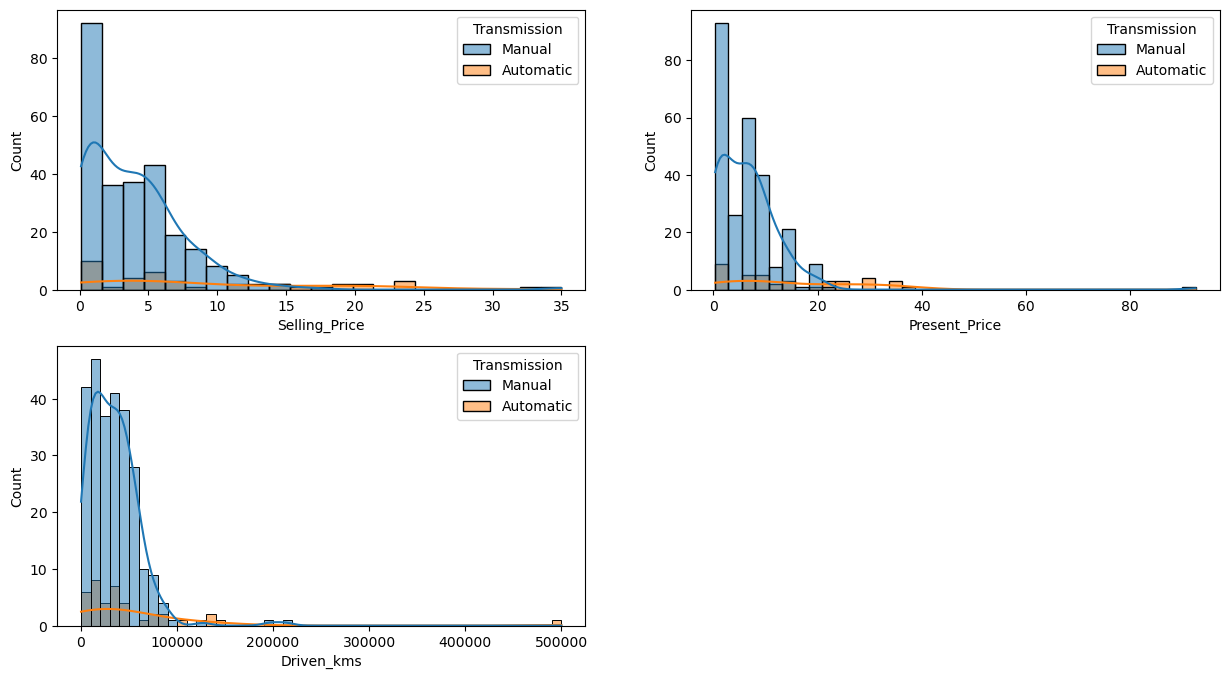

In [5]:
plt.figure(figsize = (15,8))

for i,z in enumerate(['Selling_Price', 'Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.histplot(data = df, x = z,kde = True,hue = 'Transmission')
plt.show()


In [6]:
print(df['Fuel_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64


In [7]:
ordinal_map = {'CNG':2,'Diesel':1,'Petrol':0}
df['Fuel_Type'] = df['Fuel_Type'].map(ordinal_map)
df['Fuel_Type'] = df['Fuel_Type'].astype('int64')

df = pd.get_dummies(df, columns = ['Selling_type','Transmission'])
df.dtypes

Car_Name                    object
Year                         int64
Selling_Price              float64
Present_Price              float64
Driven_kms                   int64
Fuel_Type                    int64
Owner                        int64
Selling_type_Dealer           bool
Selling_type_Individual       bool
Transmission_Automatic        bool
Transmission_Manual           bool
dtype: object

In [8]:
bool_columns = ['Selling_type_Dealer','Selling_type_Individual', 'Transmission_Automatic', 'Transmission_Manual']

df[bool_columns] = df[bool_columns].astype('int64')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Owner,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,1,0,0,1


In [9]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [11]:
def evaluation(y, predictions):
    return {
        'MAE': mean_absolute_error(y, predictions),
        'MSE': mean_squared_error(y, predictions),
        'RMSE': np.sqrt(mean_squared_error(y, predictions)),
        'R-squared': r2_score(y, predictions)
    }

In [12]:
model_name = "LinearRegression"
model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

evaluation_results_l = evaluation(y_test, predictions)

evaluation_results_l["Model"] = model_name


models = pd.DataFrame([evaluation_results_l])

print("Evaluation Results for", model_name)
print('-'*30)
for metric, value in evaluation_results_l.items():
    print(f"{metric}: {value}")

Evaluation Results for LinearRegression
------------------------------
MAE: 1.3807875348772656
MSE: 6.029883719096004
RMSE: 2.4555821548252066
R-squared: 0.8553906249885794
Model: LinearRegression
